# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    unit = "metric"
    city_url = f"{url}appid={weather_api_key}&units={unit}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        city_weather = response["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coahuayana de hidalgo
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | santa luzia
Processing Record 5 of Set 1 | fale old settlement
Processing Record 6 of Set 1 | bonthe
Processing Record 7 of Set 1 | nemuro
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | troitsk
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | richards bay
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | tank
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | minas de marcona
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | turan
Processing Record 22 of Set 1 | tazovsky
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coahuayana de hidalgo,18.7000,-103.6583,30.99,64,5,1.84,MX,1699827222
1,bredasdorp,-34.5322,20.0403,13.52,84,1,0.39,ZA,1699827222
2,waitangi,-43.9535,-176.5597,12.50,84,56,8.34,NZ,1699827222
3,santa luzia,-19.7697,-43.8514,32.50,41,46,2.05,BR,1699827223
4,fale old settlement,-9.3852,-171.2468,28.76,72,59,0.70,TK,1699827223


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coahuayana de hidalgo,18.7000,-103.6583,30.99,64,5,1.84,MX,1699827222
1,bredasdorp,-34.5322,20.0403,13.52,84,1,0.39,ZA,1699827222
2,waitangi,-43.9535,-176.5597,12.50,84,56,8.34,NZ,1699827222
3,santa luzia,-19.7697,-43.8514,32.50,41,46,2.05,BR,1699827223
4,fale old settlement,-9.3852,-171.2468,28.76,72,59,0.70,TK,1699827223


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

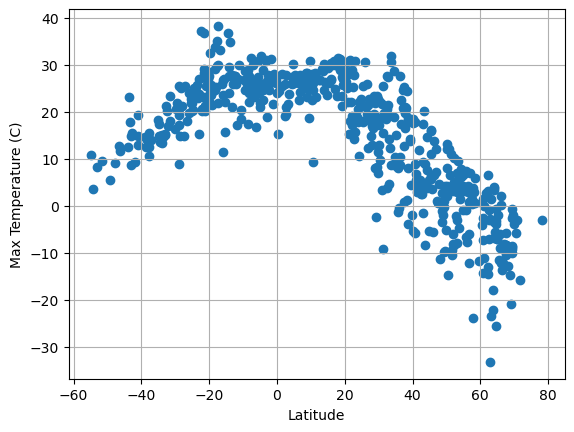

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

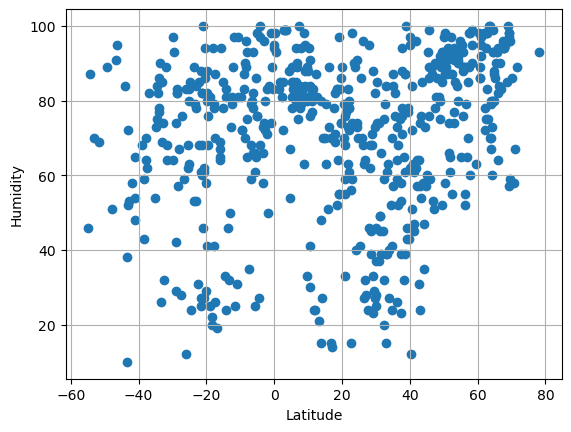

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

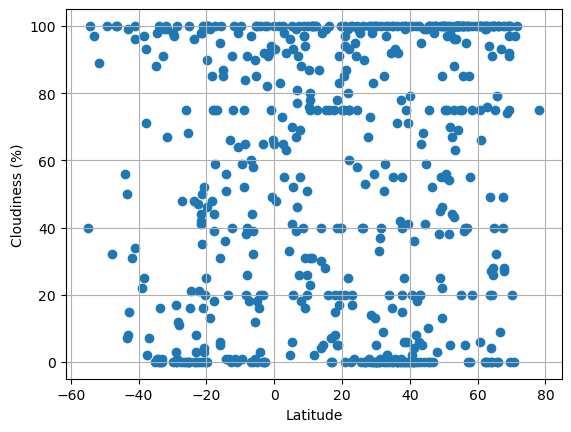

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

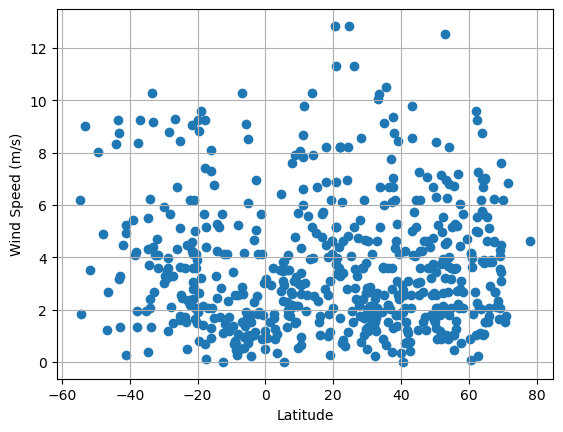

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_lin_regress(df,y_axis,x_label,y_label,annotate_val_x=5.8,annotate_val_y=0.8):
    (slope,intercept,r,p,stderr)=linregress(df["Lat"],df[y_axis])
    regress_vals = df["Lat"]*slope + intercept
    line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(df["Lat"],df[y_axis])
    plt.plot(df["Lat"],regress_vals,"r-")
    plt.annotate(line_eq,(annotate_val_x,annotate_val_y),fontsize=15,color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r value is: {r**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coahuayana de hidalgo,18.7000,-103.6583,30.99,64,5,1.84,MX,1699827222
5,bonthe,7.5264,-12.5050,26.54,84,69,2.68,SL,1699827223
6,nemuro,43.3236,145.5750,4.30,54,65,4.99,JP,1699826630
10,troitsk,54.0979,61.5773,3.44,80,69,1.81,RU,1699827224
11,college,64.8569,-147.8028,-7.03,87,100,1.54,US,1699826997


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,13.52,84,1,0.39,ZA,1699827222
2,waitangi,-43.9535,-176.5597,12.50,84,56,8.34,NZ,1699827222
3,santa luzia,-19.7697,-43.8514,32.50,41,46,2.05,BR,1699827223
4,fale old settlement,-9.3852,-171.2468,28.76,72,59,0.70,TK,1699827223
7,puerto natales,-51.7236,-72.4875,9.53,69,89,3.50,CL,1699827021


###  Temperature vs. Latitude Linear Regression Plot

The r value is: 0.7266915071136665


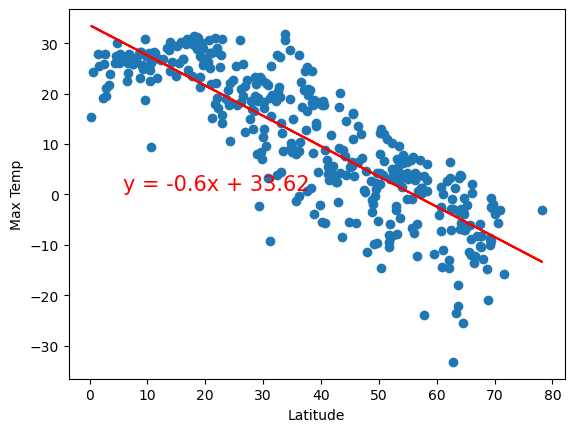

In [15]:
# Linear regression on Northern Hemisphere
plot_lin_regress(northern_hemi_df,"Max Temp","Latitude","Max Temp")

The r value is: 0.48732614122624607


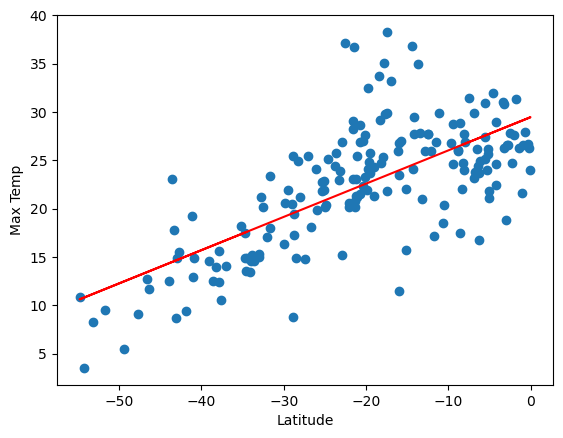

In [16]:
# Linear regression on Southern Hemisphere
plot_lin_regress(southern_hemi_df,"Max Temp","Latitude","Max Temp",-25)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The latitude vs max temperature plots are trying to show what happens to max temperature as latitude moves away from 0 in the northern hemisphere and toward 0 in the southern hemisphere. The relationship shows that as latitude gets closer to 0, max temperature increases. r^2 values of 0.73 and 0.49 suggest there is correlation between latitude and max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.052257434766158205


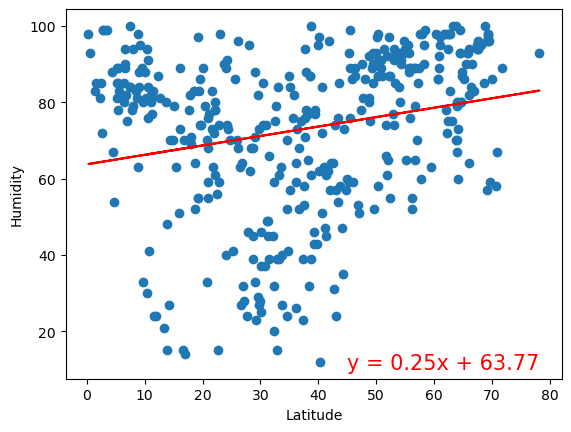

In [17]:
# Northern Hemisphere
plot_lin_regress(northern_hemi_df,"Humidity","Latitude","Humidity",45,10)

The r value is: 0.02152349074166999


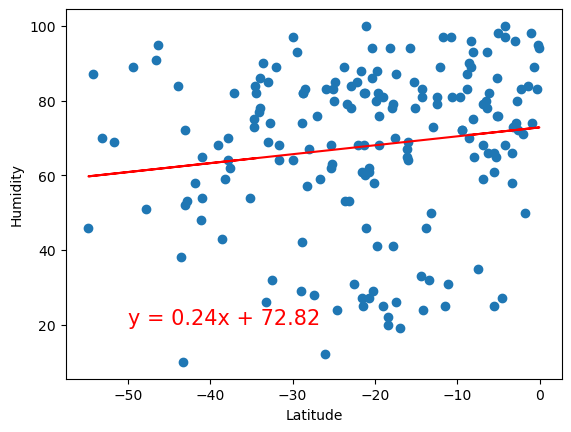

In [18]:
# Southern Hemisphere
plot_lin_regress(southern_hemi_df,"Humidity","Latitude","Humidity",-50,20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The latitude vs humidity plots are trying to show what happens to humidity as latitude moves away from 0 in the northern hemisphere and toward 0 in the southern hemisphere. Both plots show that as latitude increases, humidity also increases but r squared values of 0.02 and 0.05 suggest there isn't any correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.005756894563954745


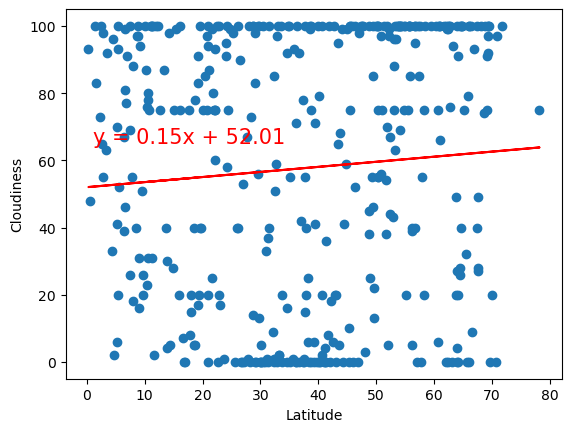

In [19]:
# Northern Hemisphere
plot_lin_regress(northern_hemi_df,"Cloudiness","Latitude","Cloudiness",1,65)

The r value is: 0.00023411591413840954


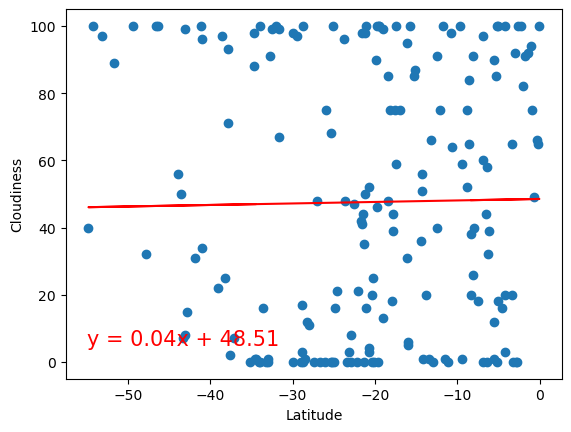

In [20]:
# Southern Hemisphere
plot_lin_regress(southern_hemi_df,"Cloudiness","Latitude","Cloudiness",-55,5)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The latitude vs cloudiness plots are trying to show what happens to cloudiness as latitude moves away from 0 in the northern hemisphere and toward 0 in the southern hemisphere. Both plots show that as latitude increases, cloudiness also increases but r squared values of 0.006 and 0.0002 suggest there isn't any correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.0006032842203872657


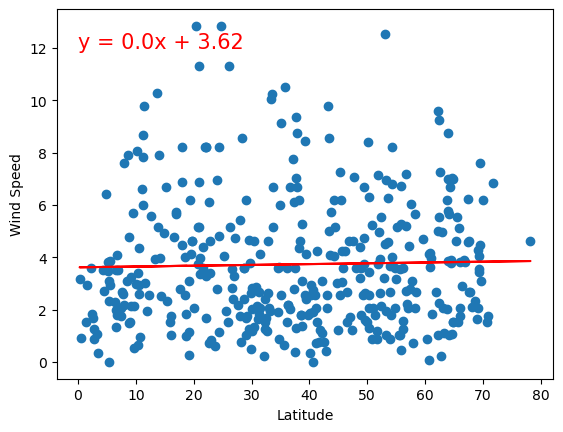

In [21]:
# Northern Hemisphere
plot_lin_regress(northern_hemi_df,"Wind Speed","Latitude","Wind Speed",0,12)

The r value is: 0.08063743739449233


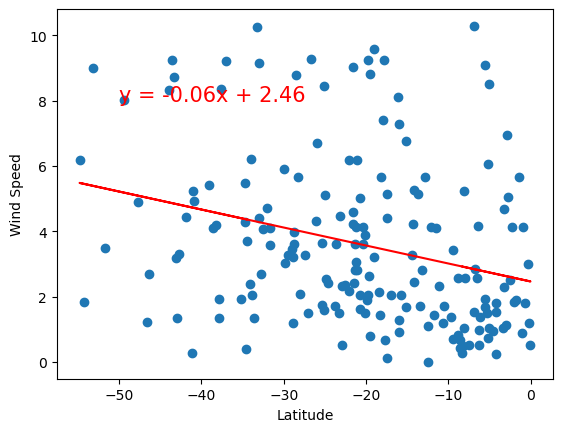

In [22]:
# Southern Hemisphere
plot_lin_regress(southern_hemi_df,"Wind Speed","Latitude","Wind Speed",-50,8)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The latitude vs wind speed plots are trying to show what happens to wind speed as latitude moves away from 0 in the northern hemisphere and toward 0 in the southern hemisphere. The plots show that as latitude increases, wind speed decreases in the southern hemisphere and increases in the northern hemisphere but r squared values of 0.0006 and 0.08 suggest there isn't any correlation.